In [1]:
#pip install pycaret

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\jvill\anaconda3\python.exe -m pip install --upgrade pip' command.


    Preparing wheel metadata: finished with status 'done'


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68727 sha256=e56bb2077a1471d29082f9c8e6b371366af115ab452d29ec29b2a384f1d14993
  Stored in directory: c:\users\jvill\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=415e6d8fe97e8a5991ed104a7a49013b44cc2428bfe4220ead30f7b7f9f64659
  Stored in directory: c:\users\jvill\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created whee

In [3]:
# pandas
import pandas as pd

In [4]:
# loading 2019-2020 nba player stat data set
nba = pd.read_csv('2019-2020 NBA Player Stats.csv')

In [5]:
nba.head(10)

,FULL NAME,TEAM,POS,AGE,GP,MPG,Minutes Percentage,Usage Rate,Turnover Rate,FTA,...,RPG,Total Rebound Percentage,Assists per game,Assist Percentage,Steals per game,Blocks per game,Turnovers per game,Versatility Index,Offensive Rating,Defensive Rating
0,Steven Adams,Okc,C,27.07,63,26.7,55.6,17.3,14.4,201,...,9.3,19.2,2.3,13.2,0.81,1.06,1.51,9.2,122.0,101.9
1,Bam Adebayo,Mia,C-F,23.08,72,33.6,69.9,21.2,17.5,382,...,10.2,17.0,5.1,24.2,1.14,1.29,2.82,11.2,116.2,102.2
2,LaMarcus Aldridge,San,F-C,35.07,53,33.1,68.9,23.4,7.8,191,...,7.4,12.0,2.4,11.4,0.68,1.64,1.40,8.4,114.7,109.1
3,Kyle Alexander,Mia,F-C,23.81,2,6.7,14.0,9.9,33.3,0,...,1.5,12.5,0.0,0.0,0.00,0.00,0.50,0.0,96.0,108.8
4,Nickeil Alexander-Walker,Nor,G,21.95,47,12.6,26.2,23.3,16.1,37,...,1.8,7.5,1.9,21.1,0.36,0.17,1.15,8.5,93.2,106.4
5,Grayson Allen,Mem,G,24.85,38,18.9,39.4,17.6,10.9,45,...,2.2,6.2,1.4,10.0,0.32,0.05,0.87,6.3,113.6,108.9
6,Jarrett Allen,Bro,C,22.32,70,26.5,55.1,14.9,11.7,270,...,9.6,18.7,1.6,8.9,0.57,1.31,1.10,8.4,131.3,101.0
7,Kadeem Allen,Nyk,G,27.58,10,11.7,24.4,20.6,14.1,11,...,0.9,4.1,2.1,27.0,0.50,0.20,0.80,7.2,106.0,111.9
8,Al-Farouq Aminu,Orl,F,29.90,18,21.1,44.0,13.2,14.7,29,...,4.9,12.5,1.2,7.4,1.00,0.44,0.94,5.6,88.2,103.7
9,Justin Anderson,Bro,F-G,26.74,10,10.7,22.4,17.1,9.1,4,...,2.1,10.1,0.8,10.1,0.00,0.60,0.40,6.3,77.7,100.4


## I'll be looking to see which variables can best predict a players' Versatility Index (rating measuring a players' ability to score, assist, and rebound). I'll use a regressor model since the versatility index is a range of numbers. 

In [6]:
from pycaret.regression import *

In [8]:
exp_clf = setup(nba, target='Versatility Index', use_gpu=True)

,Description,Value
0,session_id,5639
1,Target,Versatility Index
2,Original Data,"(591, 28)"
3,Missing Values,True
4,Numeric Features,24
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(413, 442)"


In [9]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4761,0.9124,0.8787,0.8543,0.2016,0.0580,0.2890
rf,Random Forest Regressor,0.5376,0.9241,0.9056,0.8511,0.1763,0.0702,0.7010
et,Extra Trees Regressor,0.5530,0.9822,0.9258,0.8478,0.2018,0.0698,0.7040
lightgbm,Light Gradient Boosting Machine,0.5149,1.0403,0.9265,0.8385,0.2231,0.0631,1.3010
ada,AdaBoost Regressor,0.8693,1.7586,1.2711,0.7169,0.2596,0.1177,0.1900
dt,Decision Tree Regressor,0.8624,2.0531,1.3712,0.6300,0.2476,0.1193,0.0190
omp,Orthogonal Matching Pursuit,0.6320,2.8621,1.3218,0.5760,0.3469,0.0558,0.0230
huber,Huber Regressor,0.6788,2.8494,1.3848,0.5717,0.3717,0.0601,0.3120
en,Elastic Net,0.9226,3.1081,1.5406,0.5287,0.3801,0.0970,0.0160
lasso,Lasso Regression,0.9826,3.2240,1.6184,0.5035,0.3942,0.1031,0.0250


Per the above, gradient boosting regressor seems to have the highest overall scores. Per my understanding, the theory behind boosting models is that upon compiling a number of base models (weak learners) together the overall outcome/predictability improves upon iterating additional weak learners. Will implement the gbr model below:

In [11]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6955,2.9678,1.7227,0.5875,0.4788,0.0520
1,0.4238,0.7691,0.8770,0.8265,0.2782,0.0467
2,0.4529,0.3727,0.6105,0.9364,0.1053,0.0705
3,0.3779,0.3756,0.6129,0.9136,0.2105,0.0540
4,0.4654,1.0390,1.0193,0.8632,0.3334,0.0517
5,0.3766,0.2601,0.5100,0.9493,0.0647,0.0569
6,0.5617,1.2666,1.1254,0.8765,0.1284,0.0686
7,0.5880,1.3897,1.1788,0.7262,0.2136,0.0716
8,0.4870,0.5110,0.7149,0.9087,0.1460,0.0577
9,0.3318,0.1723,0.4151,0.9553,0.0573,0.0508


In [10]:
import numpy as np

In [12]:
# train multiple gbr models with n learning_rate<br>import numpy as np
gbrs = [create_model('gbr', learning_rate = i) for i in np.arange(0.1,1,0.1)]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8786,3.4810,1.8657,0.5162,0.4370,0.0905
1,0.8871,2.0477,1.4310,0.5381,0.3235,0.1096
2,0.7354,1.0322,1.0160,0.8239,0.1996,0.0981
3,0.7861,1.8554,1.3621,0.5730,0.3444,0.0969
4,1.0206,3.3659,1.8346,0.5569,0.4830,0.1064
5,0.5560,0.6363,0.7977,0.8761,0.1428,0.0749
6,0.9138,1.6852,1.2981,0.8357,0.2819,0.1350
7,0.6903,0.9248,0.9617,0.8178,0.1413,0.0930
8,0.7004,0.8602,0.9274,0.8464,0.1120,0.0905
9,0.5296,0.5576,0.7467,0.8554,0.1007,0.0812


Woah-seems like multiple gbr models resulted in a lower R2 score (0.7240) than before (0.8543)

## Tuning

In [13]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6365,2.0304,1.4249,0.7178,0.4343,0.0515
1,0.4927,0.4915,0.7011,0.8891,0.1923,0.0673
2,0.6500,1.0893,1.0437,0.8142,0.2313,0.0904
3,0.4108,0.3558,0.5965,0.9181,0.1199,0.0683
4,0.7243,1.2292,1.1087,0.8382,0.3653,0.0880
5,0.4745,0.4728,0.6876,0.9079,0.1445,0.0808
6,0.7626,1.3591,1.1658,0.8675,0.2214,0.0922
7,0.6273,0.9728,0.9863,0.8083,0.1865,0.0812
8,0.5679,0.7091,0.8421,0.8734,0.2290,0.0642
9,0.3797,0.2129,0.4614,0.9448,0.0606,0.0555


Per above, tuning the model results in a higher R2 score (0.8579) than the initial model (0.8543).

## Ensemble methods

In [14]:
bagged_gbr = ensemble_model(gbr, 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6666,2.5571,1.5991,0.6446,0.4637,0.0528
1,0.4411,0.7435,0.8622,0.8323,0.2673,0.0451
2,0.4276,0.4113,0.6413,0.9299,0.1026,0.0657
3,0.3483,0.2322,0.4819,0.9466,0.1388,0.0581
4,0.5038,1.0941,1.0460,0.8560,0.3739,0.0490
5,0.3795,0.2647,0.5145,0.9485,0.0749,0.0559
6,0.5510,1.2739,1.1287,0.8758,0.1378,0.0612
7,0.5728,1.0515,1.0254,0.7928,0.1810,0.0736
8,0.4821,0.5040,0.7099,0.9100,0.1904,0.0527
9,0.3405,0.1869,0.4323,0.9516,0.0850,0.0503


Looks like model aggregating has produced the highest R2 score yet...

In [15]:
boosted_gbr = ensemble_model(gbr, method='Boosting', n_estimators=100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7193,3.1019,1.7612,0.5689,0.5090,0.0508
1,0.4473,0.6944,0.8333,0.8433,0.2635,0.0497
2,0.3861,0.2910,0.5394,0.9504,0.0880,0.0591
3,0.3472,0.1979,0.4449,0.9544,0.0959,0.0594
4,0.4941,1.2369,1.1122,0.8372,0.3785,0.0523
5,0.3953,0.2491,0.4991,0.9515,0.0696,0.0602
6,0.5820,1.4681,1.2116,0.8569,0.1717,0.0653
7,0.6440,1.5121,1.2297,0.7021,0.2210,0.0812
8,0.4548,0.4788,0.6919,0.9145,0.2125,0.0496
9,0.2784,0.1454,0.3813,0.9623,0.0516,0.0438


Boosted method's R2 score is similiar to the initial model score (0.8543). Based on the name it sounds as if this method is already incorporporated in the initial model's method (Gradient boosting). Seems like the bagged gbr method produced the best results.

## Plotting

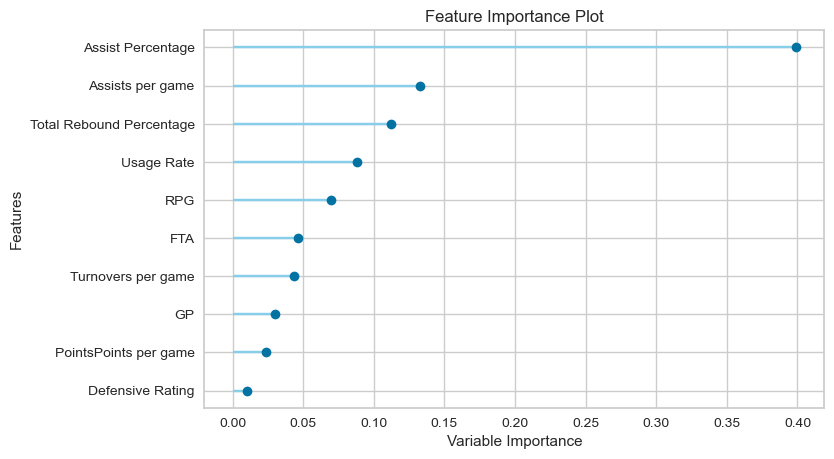

In [19]:
plot_model(gbr, 'feature')

Interesting! Although Versatility Index is based on measuring a player's ability to assist/score/rebound it seems assist-related metrics are most important in terms of determining the target's value. What I find even more interesting is that the second-lowest variable in terms of importance is points per game, so it seems if a player has elite assist & rebound percentages they can have a higher Versatility Index even if their scoring isn't necessarily elite.

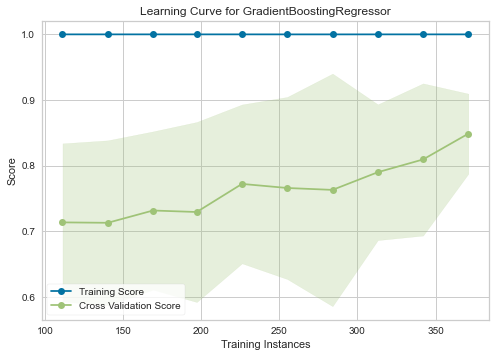

In [28]:
plot_model(tuned_gbr, 'learning')

I like the above plot because it shows how the score fluctuates as the number of training instances increase. In this case the score improves as the instances grow.

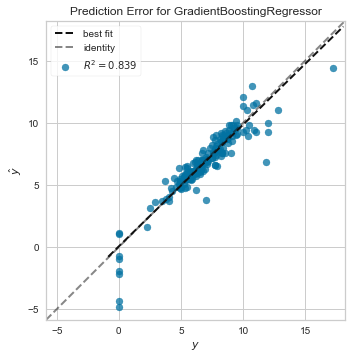

In [33]:
plot_model(tuned_gbr, 'error')

## Ultimately it seems like the gbr model is able to predict at a fairly high rate & per the predictive error plot above the best fit/most of the predictions lie along the identity line.